# Setup

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import pymongo
from pymongo import MongoClient
from datetime import datetime
print("done")

done


In [71]:
#define my database and collection
cluster = MongoClient("mongodb://127.0.0.1:27017/?readPreference=primary&appname=MongoDB%20Compass&ssl=false")
db = cluster["Rokos2021"]
collection = db["walmart_targeted"]
print("done")

done


In [72]:
#filter & store data in pandas DataFrame
results = collection.find({"_meta.inserted_at": {"$gte": datetime(2021,2,20,9,0,0),
                                "$lte":datetime(2021,2,28,9,0,0)}, 
                                "origin": {"$ne": None}, 
                                "edge_id": {"$ne": None}, 
                                "target":{"$ne":None},
                                "succeeded":True})

#convert to dataframe format
df = pd.DataFrame(list(results))
print("done")

done


# 1) Basics
A DataFrame is a table with rows & columns (pandas Series)

In [27]:
#show head / tail
df.head(3)
#df.tail()

,_id,origin,target,succeeded,run_id,date_finished,policy_goal,agent,_meta,is_final,edge_id,action,date_started,operation_time,topological_map,final_node
0,60355f5ae58b9f729ea1d688,WayPoint112,WayPoint82,True,b09bd134-ea6f-44bc-80fe-53d3dd41f62e,1970-01-01 00:00:12.801,WayPoint60,/robot_2/rapport_navigation,{'inserted_at': 2021-02-23 20:02:34.101000},False,WayPoint112_WayPoint82,move_base,1970-01-01 00:00:07.609,5.192,walmart,WayPoint82
1,60355f5a0c5936f239914148,WayPoint113,WayPoint89,True,b09bd134-ea6f-44bc-80fe-53d3dd41f62e,1970-01-01 00:00:12.921,WayPoint95,/robot_3/rapport_navigation,{'inserted_at': 2021-02-23 20:02:34.448000},False,WayPoint113_WayPoint89,move_base,1970-01-01 00:00:07.801,5.120,walmart,WayPoint89
2,60355f5b2dbb79e986b0b474,WayPoint114,WayPoint96,True,b09bd134-ea6f-44bc-80fe-53d3dd41f62e,1970-01-01 00:00:13.193,WayPoint25,/robot_4/rapport_navigation,{'inserted_at': 2021-02-23 20:02:35.218000},False,WayPoint114_WayPoint96,move_base,1970-01-01 00:00:08.010,5.183,walmart,WayPoint96


## 1a) Subsets - Series & DataFrames

In [7]:
#select column (Series) from DataFrame
df["origin"]

0        WayPoint112
1        WayPoint113
2        WayPoint114
3        WayPoint110
4        WayPoint111
            ...     
12355     WayPoint72
12356     WayPoint69
12357     WayPoint71
12358     WayPoint72
12359     WayPoint70
Name: origin, Length: 12360, dtype: object

In [9]:
#create series
my_series = pd.Series(["This", "is", "a", "pandas", "Series"], name = "phrase")
my_series

0      This
1        is
2         a
3    pandas
4    Series
Name: phrase, dtype: object

In [39]:
#create DataFrame subset
my_subset = df[["edge_id","operation_time"]]
my_subset.head(3)

,edge_id,operation_time
0,WayPoint112_WayPoint82,5.192
1,WayPoint113_WayPoint89,5.120
2,WayPoint114_WayPoint96,5.183


## 1b) Methods - require brackets

In [24]:
#max & min
t_max = df["operation_time"].max()
t_min = df["operation_time"].min()
print("max:",t_max, "    min:",t_min)

max: 86.516     min: 4.644


In [13]:
# quick stats - by default, this only operates on the numerical Series
df.describe()

,operation_time
count,12360.000000
mean,11.218859
std,3.405797
min,4.644000
25%,9.621750
50%,10.600000
75%,12.404000
max,86.516000


In [22]:
n_outliers = 0
t_mean = df["operation_time"].mean()
t_std = df["operation_time"].std()
boundary = t_mean + 5*t_std
for op_t in df["operation_time"]:
    if op_t > boundary:
        n_outliers += 1
print(n_outliers,"greater than", boundary)

48 greater than 28.247842023542326


In [30]:
#technical summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12360 entries, 0 to 12359
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   _id              12360 non-null  object        
 1   origin           12360 non-null  object        
 2   target           12360 non-null  object        
 3   succeeded        12360 non-null  bool          
 4   run_id           12360 non-null  object        
 5   date_finished    12360 non-null  datetime64[ns]
 6   policy_goal      12360 non-null  object        
 7   agent            12360 non-null  object        
 8   _meta            12360 non-null  object        
 9   is_final         12360 non-null  bool          
 10  edge_id          12360 non-null  object        
 11  action           12360 non-null  object        
 12  date_started     12360 non-null  datetime64[ns]
 13  operation_time   12360 non-null  float64       
 14  topological_map  12360 non-null  objec

In [41]:
#type of data structure
my_subset = df[["edge_id","operation_time"]]
type(my_subset)

pandas.core.frame.DataFrame

## 1c) Attributes - no brackets

In [35]:
#datatypes
#e.g integers (int64), floats (float64), strings (object)
df.dtypes

_id                        object
origin                     object
target                     object
succeeded                    bool
run_id                     object
date_finished      datetime64[ns]
policy_goal                object
agent                      object
_meta                      object
is_final                     bool
edge_id                    object
action                     object
date_started       datetime64[ns]
operation_time            float64
topological_map            object
final_node                 object
dtype: object

In [33]:
print(df.shape)
print(df["is_final"].shape)

(12360, 16)
(12360,)


# 2) Filtering

## 2a) By row

In [45]:
#conditions
above_10 = df[df["operation_time"] > 10]
print(above_10.shape)
above_10.head(3)

(8193, 16)


,_id,origin,target,succeeded,run_id,date_finished,policy_goal,agent,_meta,is_final,edge_id,action,date_started,operation_time,topological_map,final_node
5,60355f7a0c5936f239914149,WayPoint89,WayPoint90,True,b09bd134-ea6f-44bc-80fe-53d3dd41f62e,1970-01-01 00:00:23.108,WayPoint95,/robot_3/rapport_navigation,{'inserted_at': 2021-02-23 20:03:06.981000},False,WayPoint89_WayPoint90,move_base,1970-01-01 00:00:12.801,10.307,walmart,WayPoint90
7,60355f7ce58b9f729ea1d689,WayPoint82,WayPoint75,True,b09bd134-ea6f-44bc-80fe-53d3dd41f62e,1970-01-01 00:00:23.534,WayPoint60,/robot_2/rapport_navigation,{'inserted_at': 2021-02-23 20:03:08.377000},False,WayPoint82_WayPoint75,move_base,1970-01-01 00:00:12.712,10.822,walmart,WayPoint75
8,60355f7e82434d00acf1b77a,WayPoint68,WayPoint61,True,b09bd134-ea6f-44bc-80fe-53d3dd41f62e,1970-01-01 00:00:24.118,WayPoint39,/robot_0/rapport_navigation,{'inserted_at': 2021-02-23 20:03:10.269000},False,WayPoint68_WayPoint61,move_base,1970-01-01 00:00:13.402,10.716,walmart,WayPoint61


In [55]:
#Is equal to a specific value
twoway_89_90 = df[df["origin"].isin(["WayPoint89","WayPoint90"]) & df["target"].isin(["WayPoint89","WayPoint90"])]
print(twoway_89_90.shape)
twoway_89_90.head(3)

(46, 16)


,_id,origin,target,succeeded,run_id,date_finished,policy_goal,agent,_meta,is_final,edge_id,action,date_started,operation_time,topological_map,final_node
5,60355f7a0c5936f239914149,WayPoint89,WayPoint90,True,b09bd134-ea6f-44bc-80fe-53d3dd41f62e,1970-01-01 00:00:23.108,WayPoint95,/robot_3/rapport_navigation,{'inserted_at': 2021-02-23 20:03:06.981000},False,WayPoint89_WayPoint90,move_base,1970-01-01 00:00:12.801,10.307,walmart,WayPoint90
232,603571711a8190816a312741,WayPoint89,WayPoint90,True,11fe6db9-2cd3-4cf3-960e-b5972bc34361,1970-01-01 00:00:31.800,WayPoint95,/robot_3/rapport_navigation,{'inserted_at': 2021-02-23 21:19:45.794000},False,WayPoint89_WayPoint90,move_base,1970-01-01 00:00:21.799,10.001,walmart,WayPoint90
1479,60367df85371305c634324a8,WayPoint89,WayPoint90,True,e7759cb2-983c-4642-b8bd-defc17cc720b,1970-01-01 00:00:19.951,WayPoint95,/robot_3/rapport_navigation,{'inserted_at': 2021-02-24 16:25:28.170000},False,WayPoint89_WayPoint90,move_base,1970-01-01 00:00:10.029,9.922,walmart,WayPoint90


In [57]:
#Combining conditions
#each condition must be surrounded by parentheses ()
#OR operator | 
#AND operator &
oneway_60_61 = df[ (df["origin"] == "WayPoint82") & (df["target"] == "WayPoint75") ]
print(oneway_60_61.shape)
oneway_60_61.head(3)

(189, 16)


,_id,origin,target,succeeded,run_id,date_finished,policy_goal,agent,_meta,is_final,edge_id,action,date_started,operation_time,topological_map,final_node
7,60355f7ce58b9f729ea1d689,WayPoint82,WayPoint75,True,b09bd134-ea6f-44bc-80fe-53d3dd41f62e,1970-01-01 00:00:23.534,WayPoint60,/robot_2/rapport_navigation,{'inserted_at': 2021-02-23 20:03:08.377000},False,WayPoint82_WayPoint75,move_base,1970-01-01 00:00:12.712,10.822,walmart,WayPoint75
19,60355fd52dbb79e986b0b477,WayPoint82,WayPoint75,True,b09bd134-ea6f-44bc-80fe-53d3dd41f62e,1970-01-01 00:00:51.833,WayPoint25,/robot_4/rapport_navigation,{'inserted_at': 2021-02-23 20:04:37.143000},False,WayPoint82_WayPoint75,move_base,1970-01-01 00:00:41.109,10.724,walmart,WayPoint75
233,6035717417dd9d86f45467f1,WayPoint82,WayPoint75,True,11fe6db9-2cd3-4cf3-960e-b5972bc34361,1970-01-01 00:00:32.650,WayPoint60,/robot_2/rapport_navigation,{'inserted_at': 2021-02-23 21:19:48.772000},False,WayPoint82_WayPoint75,move_base,1970-01-01 00:00:21.468,11.182,walmart,WayPoint75


In [59]:
# not null
origin_not_na = df[ df["origin"].notna() ]
print(origin_not_na.shape)
origin_not_na.head(3)

(12360, 16)


,_id,origin,target,succeeded,run_id,date_finished,policy_goal,agent,_meta,is_final,edge_id,action,date_started,operation_time,topological_map,final_node
0,60355f5ae58b9f729ea1d688,WayPoint112,WayPoint82,True,b09bd134-ea6f-44bc-80fe-53d3dd41f62e,1970-01-01 00:00:12.801,WayPoint60,/robot_2/rapport_navigation,{'inserted_at': 2021-02-23 20:02:34.101000},False,WayPoint112_WayPoint82,move_base,1970-01-01 00:00:07.609,5.192,walmart,WayPoint82
1,60355f5a0c5936f239914148,WayPoint113,WayPoint89,True,b09bd134-ea6f-44bc-80fe-53d3dd41f62e,1970-01-01 00:00:12.921,WayPoint95,/robot_3/rapport_navigation,{'inserted_at': 2021-02-23 20:02:34.448000},False,WayPoint113_WayPoint89,move_base,1970-01-01 00:00:07.801,5.120,walmart,WayPoint89
2,60355f5b2dbb79e986b0b474,WayPoint114,WayPoint96,True,b09bd134-ea6f-44bc-80fe-53d3dd41f62e,1970-01-01 00:00:13.193,WayPoint25,/robot_4/rapport_navigation,{'inserted_at': 2021-02-23 20:02:35.218000},False,WayPoint114_WayPoint96,move_base,1970-01-01 00:00:08.010,5.183,walmart,WayPoint96


## 2b) By Row & Column - loc/iloc
 - loc is label-based so specify by row/col labels <br>
 - iloc is integer-based so specify indices <br>
 - before comma is row, after comma is column
 - loc/iloc can be used for reassigning values

In [64]:
#loc
twoway_89_90 = df.loc[df["origin"].isin(["WayPoint89","WayPoint90"]) & df["target"].isin(["WayPoint89","WayPoint90"]), ["action", "operation_time"]]
print(twoway_89_90.shape)
twoway_89_90.head(3)

(46, 2)


,action,operation_time
5,move_base,10.307
232,move_base,10.001
1479,move_base,9.922


In [66]:
#iloc
subset = df.iloc[1:3, 5:10]
print(subset.shape)
subset.head(3)

(2, 5)


,date_finished,policy_goal,agent,_meta,is_final
1,1970-01-01 00:00:12.921,WayPoint95,/robot_3/rapport_navigation,{'inserted_at': 2021-02-23 20:02:34.448000},False
2,1970-01-01 00:00:13.193,WayPoint25,/robot_4/rapport_navigation,{'inserted_at': 2021-02-23 20:02:35.218000},False


In [69]:
#replace values
df.iloc[1:3, 5:10] = "hi"
print(subset.shape)
subset.head(3) # unchanged
df.iloc[1:3, 5:10].head(3) # changed

(2, 5)


,date_finished,policy_goal,agent,_meta,is_final
1,hi,hi,hi,hi,hi
2,hi,hi,hi,hi,hi


# 3) Create plots

In [91]:
#available plots
[method_name 
 for method_name in dir(df.plot) 
 if not method_name.startswith("_")]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

## 3a) Default - line plot for numeric data

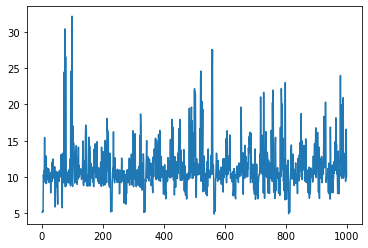

In [79]:
df.loc[1:1000,"operation_time"].plot()

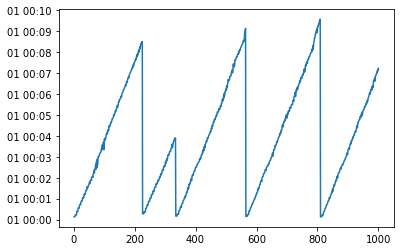

In [81]:
df.loc[1:1000,"date_started"].plot()

## 3b) Scatter

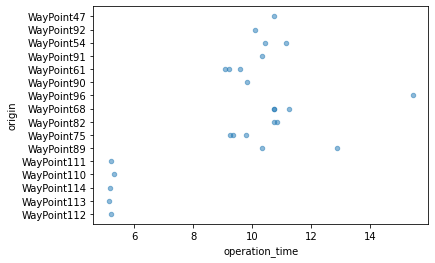

In [89]:
df[0:25].plot.scatter(x="operation_time", y = "origin", alpha = 0.5)

## 3c) Boxplot

(472, 16)


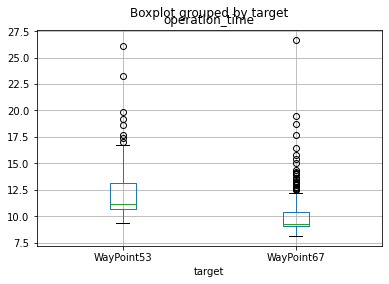

In [112]:
#outliers plotted as individual points
origin_60 = df[df["origin"] == "WayPoint60"]
print(origin_60.shape)
origin_60.boxplot(column = "operation_time", by = "target")

## 3d) Customise plots

In [115]:
df.head(2)

,_id,origin,target,succeeded,run_id,date_finished,policy_goal,agent,_meta,is_final,edge_id,action,date_started,operation_time,topological_map,final_node
0,60355f5ae58b9f729ea1d688,WayPoint112,WayPoint82,True,b09bd134-ea6f-44bc-80fe-53d3dd41f62e,1970-01-01 00:00:12.801,WayPoint60,/robot_2/rapport_navigation,{'inserted_at': 2021-02-23 20:02:34.101000},False,WayPoint112_WayPoint82,move_base,1970-01-01 00:00:07.609,5.192,walmart,WayPoint82
1,60355f5a0c5936f239914148,WayPoint113,WayPoint89,True,b09bd134-ea6f-44bc-80fe-53d3dd41f62e,1970-01-01 00:00:12.921,WayPoint95,/robot_3/rapport_navigation,{'inserted_at': 2021-02-23 20:02:34.448000},False,WayPoint113_WayPoint89,move_base,1970-01-01 00:00:07.801,5.120,walmart,WayPoint89


In [126]:
subset = df.loc[0:, ["edge_id","date_started", "date_finished"]]
subset.head(2)

,edge_id,date_started,date_finished
0,WayPoint112_WayPoint82,1970-01-01 00:00:07.609,1970-01-01 00:00:12.801
1,WayPoint113_WayPoint89,1970-01-01 00:00:07.801,1970-01-01 00:00:12.921


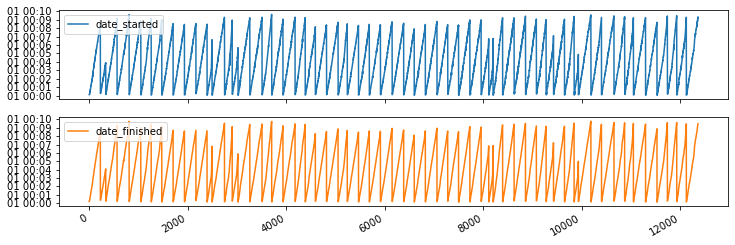

In [134]:
#subplots
axs = subset.plot(figsize=(12,4), subplots = True)

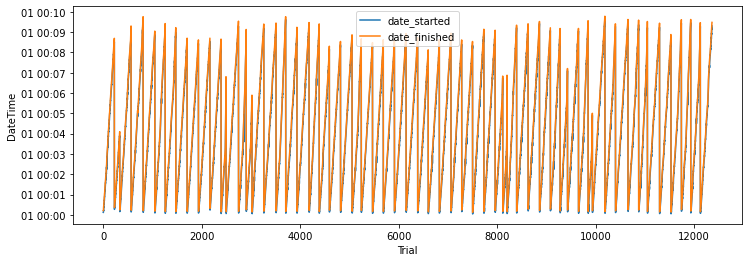

In [138]:
#further customisation
fig, axs = plt.subplots(figsize=(12,4))   #create empty fig & axes
subset.plot(ax = axs)
axs.set_ylabel("DateTime")
axs.set_xlabel("Trial")
fig.savefig("test.png")